In [4]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest


In [14]:
# student =pd.read_csv('./student_data_with_missing_outliers.csv')

data=pd.read_csv('student_data_with_missing_outliers.csv')

In [15]:
data


,student_id,age,gender,department,GPA,attendance_rate,financial_aid,parent_education_level,hours_studied_per_week,internet_access,dropout
0,S1000,22,Male,CS,3.30,56.83,Yes,Primary,13.4,Yes,No
1,S1001,19,Male,CS,4.28,64.55,No,Tertiary,10.9,Yes,No
2,S1002,28,Male,CS,3.90,49.83,Yes,Tertiary,9.0,Yes,No
3,S1003,26,Male,CE,2.36,85.07,Yes,Tertiary,7.1,Yes,No
4,S1004,23,Female,CE,3.24,57.82,No,Secondary,19.5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,23,Male,CE,1.92,88.63,Yes,Secondary,15.0,Yes,Yes
996,S1996,27,Male,CS,1.62,73.01,Yes,Tertiary,6.4,Yes,No
997,S1997,29,Female,EE,4.02,NaN,Yes,Primary,17.3,Yes,No
998,S1998,22,Male,BA,3.61,47.75,Yes,Secondary,6.9,Yes,Yes


In [16]:
data

,student_id,age,gender,department,GPA,attendance_rate,financial_aid,parent_education_level,hours_studied_per_week,internet_access,dropout
0,S1000,22,Male,CS,3.30,56.83,Yes,Primary,13.4,Yes,No
1,S1001,19,Male,CS,4.28,64.55,No,Tertiary,10.9,Yes,No
2,S1002,28,Male,CS,3.90,49.83,Yes,Tertiary,9.0,Yes,No
3,S1003,26,Male,CE,2.36,85.07,Yes,Tertiary,7.1,Yes,No
4,S1004,23,Female,CE,3.24,57.82,No,Secondary,19.5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,23,Male,CE,1.92,88.63,Yes,Secondary,15.0,Yes,Yes
996,S1996,27,Male,CS,1.62,73.01,Yes,Tertiary,6.4,Yes,No
997,S1997,29,Female,EE,4.02,NaN,Yes,Primary,17.3,Yes,No
998,S1998,22,Male,BA,3.61,47.75,Yes,Secondary,6.9,Yes,Yes


In [18]:
data.info

<bound method DataFrame.info of     student_id  age  gender department   GPA  attendance_rate financial_aid  \
0        S1000   22    Male         CS  3.30            56.83           Yes   
1        S1001   19    Male         CS  4.28            64.55            No   
2        S1002   28    Male         CS  3.90            49.83           Yes   
3        S1003   26    Male         CE  2.36            85.07           Yes   
4        S1004   23  Female         CE  3.24            57.82            No   
..         ...  ...     ...        ...   ...              ...           ...   
995      S1995   23    Male         CE  1.92            88.63           Yes   
996      S1996   27    Male         CS  1.62            73.01           Yes   
997      S1997   29  Female         EE  4.02              NaN           Yes   
998      S1998   22    Male         BA  3.61            47.75           Yes   
999      S1999   25    Male         BA  2.73            82.94            No   

    parent_educatio

In [17]:
 data.describe()


,age,GPA,attendance_rate,hours_studied_per_week
count,1000.000000,950.000000,950.000000,951.000000
mean,22.443000,3.025137,65.073084,12.774658
std,4.113596,0.897454,20.017824,7.244883
min,16.000000,-2.000000,30.090000,0.000000
25%,19.000000,2.480000,47.795000,8.700000
50%,22.000000,3.060000,65.380000,12.200000
75%,26.000000,3.580000,82.897500,15.800000
max,29.000000,6.500000,99.830000,70.000000


In [21]:
data.corr

<bound method DataFrame.corr of     student_id  age  gender department   GPA  attendance_rate financial_aid  \
0        S1000   22    Male         CS  3.30            56.83           Yes   
1        S1001   19    Male         CS  4.28            64.55            No   
2        S1002   28    Male         CS  3.90            49.83           Yes   
3        S1003   26    Male         CE  2.36            85.07           Yes   
4        S1004   23  Female         CE  3.24            57.82            No   
..         ...  ...     ...        ...   ...              ...           ...   
995      S1995   23    Male         CE  1.92            88.63           Yes   
996      S1996   27    Male         CS  1.62            73.01           Yes   
997      S1997   29  Female         EE  4.02              NaN           Yes   
998      S1998   22    Male         BA  3.61            47.75           Yes   
999      S1999   25    Male         BA  2.73            82.94            No   

    parent_educatio

In [ ]:
data.hist()

In [24]:
# 1. Handle missing values
# data.dropna(inplace=True)  # Remove rows with missing values

# data.fillna(data.mean(), inplace=True) # Replace with mean/median
# to convert to numeric options
# colmns already nmeric 
# data['column'].dtype()
# 1. to remove rows with non-nmeric vales
# data['column']=pd.to_numeric(data['colmn'], errors='coerce')

# 2. if yo want remove rows with non-nmeric vales with a specific(eg, 0)
# data= df[pd.to_numeric(data['column'], errors='coerce').notnull()]
# 2. if yo want remove rows with non-nmeric vales with a specific(eg, 0)
# data[pd.to_numeric(data['CGPA'], errors='coerce').fillna(data.mean) ]
# data=(data['CGPA'], error='coerce'.fillna(data.mean))

# Filling missing 
data['GPA'].fillna(data['GPA'].mean())



0      3.30
1      4.28
2      3.90
3      2.36
4      3.24
       ... 
994    3.37
995    1.92
996    1.62
998    3.61
999    2.73
Name: GPA, Length: 676, dtype: float64

In [23]:
data.describe()


,age,GPA,attendance_rate,hours_studied_per_week
count,1000.000000,950.000000,950.000000,951.000000
mean,22.443000,3.025137,65.073084,12.774658
std,4.113596,0.897454,20.017824,7.244883
min,16.000000,-2.000000,30.090000,0.000000
25%,19.000000,2.480000,47.795000,8.700000
50%,22.000000,3.060000,65.380000,12.200000
75%,26.000000,3.580000,82.897500,15.800000
max,29.000000,6.500000,99.830000,70.000000


In [25]:
data

,student_id,age,gender,department,GPA,attendance_rate,financial_aid,parent_education_level,hours_studied_per_week,internet_access,dropout
0,S1000,22,Male,CS,3.30,56.83,Yes,Primary,13.4,Yes,No
1,S1001,19,Male,CS,4.28,64.55,No,Tertiary,10.9,Yes,No
2,S1002,28,Male,CS,3.90,49.83,Yes,Tertiary,9.0,Yes,No
3,S1003,26,Male,CE,2.36,85.07,Yes,Tertiary,7.1,Yes,No
4,S1004,23,Female,CE,3.24,57.82,No,Secondary,19.5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
994,S1994,16,Female,CS,3.37,51.55,No,Tertiary,15.9,Yes,No
995,S1995,23,Male,CE,1.92,88.63,Yes,Secondary,15.0,Yes,Yes
996,S1996,27,Male,CS,1.62,73.01,Yes,Tertiary,6.4,Yes,No
998,S1998,22,Male,BA,3.61,47.75,Yes,Secondary,6.9,Yes,Yes


In [66]:
import matplotlib.pyplot as plt
import numpy as np

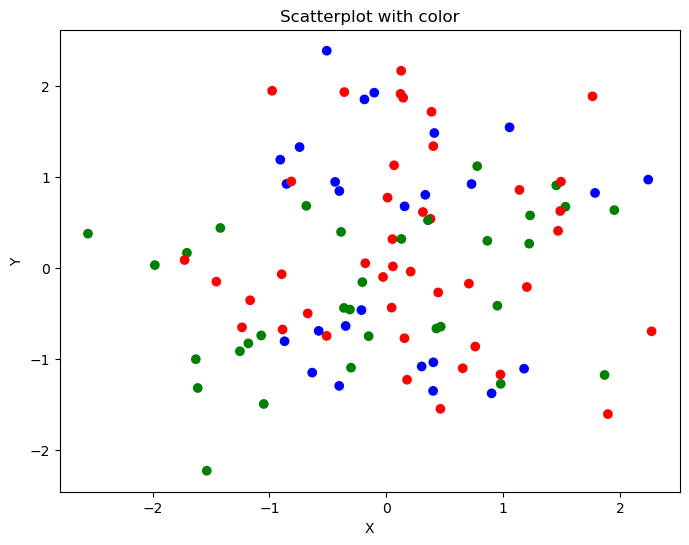

In [74]:
np.random.seed(0)
data2={
    'X':np.random.randn(100),
    'Y':np.random.randn(100),
    'Category':np.random.choice(['A', 'B', 'C'], 100)
}

df=pd.DataFrame(data2)
# strimming
# df['']
# Scatterplot with color
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], c=df['Category'].map({'A':'red', 'B':'green', 'C':'blue'}))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot with color')
plt.show()
            

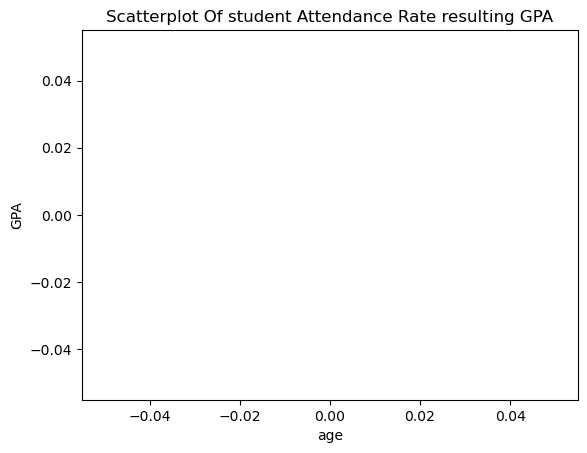

In [80]:
# USing student data_outliers
df=pd.DataFrame(data)
# plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['GPA'], c=df['attendance_rate'].map({'age':'red', 'GPA':'green', 'attendance_rate':'blue'}))
plt.xlabel('age')
plt.ylabel('GPA')
plt.title('Scatterplot Of student Attendance Rate resulting GPA')
plt.show()

In [29]:
# To save Data on Csv
data.to_csv('./update_student_assign-data.csv', index=False)
# To save data on xlsx
data.to_csv('./update_student_assign-data.xlsx', index=False)

In [27]:
data.drop_duplicates(inplace=True)
data

,student_id,age,gender,department,GPA,attendance_rate,financial_aid,parent_education_level,hours_studied_per_week,internet_access,dropout
0,S1000,22,Male,CS,3.30,56.83,Yes,Primary,13.4,Yes,No
1,S1001,19,Male,CS,4.28,64.55,No,Tertiary,10.9,Yes,No
2,S1002,28,Male,CS,3.90,49.83,Yes,Tertiary,9.0,Yes,No
3,S1003,26,Male,CE,2.36,85.07,Yes,Tertiary,7.1,Yes,No
4,S1004,23,Female,CE,3.24,57.82,No,Secondary,19.5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
994,S1994,16,Female,CS,3.37,51.55,No,Tertiary,15.9,Yes,No
995,S1995,23,Male,CE,1.92,88.63,Yes,Secondary,15.0,Yes,Yes
996,S1996,27,Male,CS,1.62,73.01,Yes,Tertiary,6.4,Yes,No
998,S1998,22,Male,BA,3.61,47.75,Yes,Secondary,6.9,Yes,Yes


In [29]:
# data.drop(data['gender'])
data

,student_id,age,gender,department,GPA,attendance_rate,financial_aid,parent_education_level,hours_studied_per_week,internet_access,dropout
0,S1000,22,Male,CS,3.30,56.83,Yes,Primary,13.4,Yes,No
1,S1001,19,Male,CS,4.28,64.55,No,Tertiary,10.9,Yes,No
2,S1002,28,Male,CS,3.90,49.83,Yes,Tertiary,9.0,Yes,No
3,S1003,26,Male,CE,2.36,85.07,Yes,Tertiary,7.1,Yes,No
4,S1004,23,Female,CE,3.24,57.82,No,Secondary,19.5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,23,Male,CE,1.92,88.63,Yes,Secondary,15.0,Yes,Yes
996,S1996,27,Male,CS,1.62,73.01,Yes,Tertiary,6.4,Yes,No
997,S1997,29,Female,EE,4.02,NaN,Yes,Primary,17.3,Yes,No
998,S1998,22,Male,BA,3.61,47.75,Yes,Secondary,6.9,Yes,Yes


In [33]:
data.dropna(inplace=True)
data


,student_id,age,gender,department,GPA,attendance_rate,financial_aid,parent_education_level,hours_studied_per_week,internet_access,dropout
0,S1000,22,Male,CS,3.30,56.83,Yes,Primary,13.4,Yes,No
1,S1001,19,Male,CS,4.28,64.55,No,Tertiary,10.9,Yes,No
2,S1002,28,Male,CS,3.90,49.83,Yes,Tertiary,9.0,Yes,No
3,S1003,26,Male,CE,2.36,85.07,Yes,Tertiary,7.1,Yes,No
4,S1004,23,Female,CE,3.24,57.82,No,Secondary,19.5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
994,S1994,16,Female,CS,3.37,51.55,No,Tertiary,15.9,Yes,No
995,S1995,23,Male,CE,1.92,88.63,Yes,Secondary,15.0,Yes,Yes
996,S1996,27,Male,CS,1.62,73.01,Yes,Tertiary,6.4,Yes,No
998,S1998,22,Male,BA,3.61,47.75,Yes,Secondary,6.9,Yes,Yes


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'GPA'}>],
       [<Axes: title={'center': 'attendance_rate'}>,
        <Axes: title={'center': 'hours_studied_per_week'}>]], dtype=object)

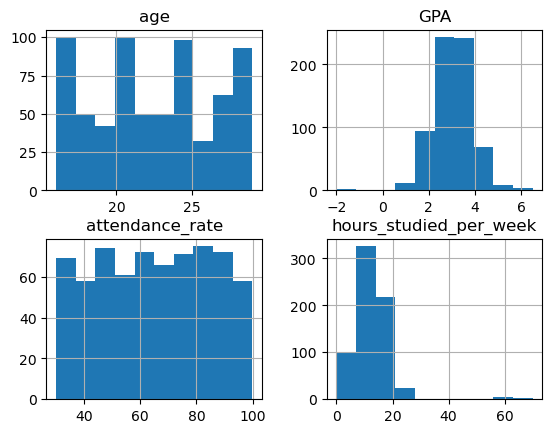

In [35]:
data.hist()

In [ ]:
# DATA SCIENCE CORSE ASSIGNMENT

# DataScience Processing  data cleaning, handling outliers, 
# and data mining using Pandas, NumPy, and Scikit-learn:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Load your dataset
df = pd.read_csv('your_data.csv')

# **Data Cleaning**
1. Handle missing values
df.dropna(inplace=True)  # Remove rows with missing values
df.fillna(df.mean(), inplace=True)  # Replace with mean/median

# 2. Remove duplicates
df.drop_duplicates(inplace=True)

# 3. Convert data types
df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

# **Handling Outliers**
1. Using IQR (Interquartile Range)
Q1 = df['column_name'].quantile(0.25)
Q3 = df['column_name'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['column_name'] >= Q1 - 1.5*IQR) & (df['column_name'] <= Q3 + 1.5*IQR)]

# 2. Using Isolation Forest
iforest = IsolationForest(contamination=0.01)
df['outlier'] = iforest.fit_predict(df[['column_name']])
df = df[df['outlier'] == 1]

# **Data Mining**
1. Feature scaling
scaler = StandardScaler()

df[['column_name']] = scaler.fit_transform(df[['column_name']])

2. Correlation analysis
corr_matrix = df.corr()
print(corr_matrix)

# 3. Feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif
X = df.drop('target', axis=1)
y = df['target']
selector = SelectKBest(mutual_info_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Example usage
print(df.head())
print(df.info())
print(df.describe())
# This code covers:
# - *Data cleaning*: handling missing values, 

duplicates, and data types
- *Handling outliers*: using IQR and Isolation Forest
- *Data mining*: feature scaling, correlation analysis, and feature selection

Want to:
- Handle categorical variables?
- Perform dimensionality reduction (PCA, t-SNE)?
- Build a machine learning model? 🤔

